4b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Rmin = 4.60209439806843

In [2]:
def pot(r1,r2):
    sig = 4.1 #A
    eps = 1.77 #kJ/mol
    Rij = np.sum((r1-r2)**2)**0.5
    U = 4*eps*(((sig/Rij)**12)-((sig/Rij)**6)) #kJ/mol
    return U

In [3]:
def position(n):
    atomposition = np.array([])
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                atomrow = np.array([i, j, k]) * Rmin
                atomposition = np.append(atomposition, atomrow)
    atomposition = np.reshape(atomposition, (n**3, 3))
    return atomposition    

In [4]:
positions1 = np.array ([0.0,0.0,0.0])
positions2 = np.array ([0.0,0.0,6.0])

In [5]:
def force(p1,p2):
    sig = 4.1
    eps = 1.77
    Rij = np.sum((p1-p2)**2)**0.5
    F = (((4*eps*(((-12*sig**12)/(Rij**13))+((6*sig**6)/(Rij**7)))) / Rij) * ((p1 - p2)/Rij)) * (-1)
    negF = (((4*eps*(((-12*sig**12)/(Rij**13))+((6*sig**6)/(Rij**7)))) / Rij) * ((p1 - p2)/Rij))
    return F, negF

In [6]:
Fij = force(positions1,positions2)

print(Fij)

(array([-0.       , -0.       ,  0.0956746]), array([ 0.       ,  0.       , -0.0956746]))


4c

In [7]:
def calcforce(p1,p2):
    sig = 4.1
    eps = 1.77
    Rij = np.sum((p1-p2)**2)**0.5
    F = ((4*eps*(((-12*sig**12)/(Rij**13))+((6*sig**6)/(Rij**7)))) * ((p1 - p2)/Rij)) * (-1)
    return F

In [8]:
atomposition2 = position(2)

In [9]:
n=2
opt_force = np.array([])
totalforce = np.array([0,0,0])
for k in range(0, n**3):
    for h in range(0, n**3):
        if k != h:
            Fi = calcforce(atomposition2[k], atomposition2[h])
            totalforce = np.add(Fi, totalforce)
            
    opt_force = np.append(opt_force, totalforce)
    totalforce = np.array([0, 0, 0])
opt_force = np.reshape(opt_force, (n**3, 3))
print(opt_force)

[[ 0.5596659  0.5596659  0.5596659]
 [ 0.5596659  0.5596659 -0.5596659]
 [ 0.5596659 -0.5596659  0.5596659]
 [ 0.5596659 -0.5596659 -0.5596659]
 [-0.5596659  0.5596659  0.5596659]
 [-0.5596659  0.5596659 -0.5596659]
 [-0.5596659 -0.5596659  0.5596659]
 [-0.5596659 -0.5596659 -0.5596659]]


4d

In [19]:
opt_position = position(3)

In [11]:
def totforcematrix(cube):    
    atomforce3 = np.array([])
    totalforce = np.array([0, 0, 0])
    for i in range(0, 27):
        for j in range(0, 27):
            if i != j:
                Fi = calcforce(cube[i], cube[j])
                totalforce = np.add(Fi, totalforce)

        atomforce3 = np.append(atomforce3, totalforce)
        totalforce = np.array([0, 0, 0])
    atomforce3 = np.reshape(atomforce3, (27, 3))
    return atomforce3

In [12]:
def totenergycube(cube):
    TotalE = 0
    for i in range(0, 27):
        for j in range(0, 27):
            if i != j:
                TotalE = TotalE + pot(cube[i], cube[j])
    TotalE = TotalE/2
    return TotalE

In [13]:
cubeforcein = totforcematrix(position(3))
print(cubeforcein)

[[ 6.61746160e-01  6.61746160e-01  6.61746160e-01]
 [ 9.80031637e-01  9.80031637e-01  0.00000000e+00]
 [ 6.61746160e-01  6.61746160e-01 -6.61746160e-01]
 [ 9.80031637e-01  5.31259065e-18  9.80031637e-01]
 [ 1.35152313e+00  2.73218947e-17  0.00000000e+00]
 [ 9.80031637e-01 -8.67361738e-19 -9.80031637e-01]
 [ 6.61746160e-01 -6.61746160e-01  6.61746160e-01]
 [ 9.80031637e-01 -9.80031637e-01  0.00000000e+00]
 [ 6.61746160e-01 -6.61746160e-01 -6.61746160e-01]
 [ 6.25584654e-17  9.80031637e-01  9.80031637e-01]
 [ 8.97719399e-17  1.35152313e+00  0.00000000e+00]
 [-5.29090660e-17  9.80031637e-01 -9.80031637e-01]
 [ 3.90312782e-18  3.90312782e-18  1.35152313e+00]
 [ 1.38777878e-16  2.77555756e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35152313e+00]
 [ 5.46437895e-17 -9.80031637e-01  9.80031637e-01]
 [-5.55111512e-17 -1.35152313e+00  0.00000000e+00]
 [-3.99680289e-17 -9.80031637e-01 -9.80031637e-01]
 [-6.61746160e-01  6.61746160e-01  6.61746160e-01]
 [-9.80031637e-01  9.80031637e-

In [14]:
def optcube(cube, size, steps):
    step_energy = np.array([])
    for i in range(0, steps):
        forcematrix = totforcematrix(cube)
        energystep = totenergycube(cube)
        energystep = totenergycube(cube)
        step_energy = np.append(step_energy, energystep)
        normalize = np.array([])
        for j in range(0, 27):
            if np.round((np.sum((forcematrix[j])**2)),10) == 0:
                normalize = np.append(normalize, 0)
            else:
                normalize = np.append(normalize, (1/((np.sum((forcematrix[j])**2))**0.5)))
                
        normalize = np.reshape(normalize, (27, 1))
        stepsize = forcematrix * normalize * size
        cube = cube + stepsize
    return cube, step_energy

In [15]:
optmid, energy_mid = optcube(position(3), 0.01, 3000)
print(optmid)

[[ 0.44293248 -1.30000209  1.21548534]
 [ 1.56911874  1.3201689   4.66040504]
 [ 0.6018239  -1.26693769  8.19375432]
 [ 0.1208679   3.40586418  0.95207195]
 [ 1.45345588  5.75084077  4.65706867]
 [ 0.30750421  3.45142205  8.4319845 ]
 [ 0.10163339  8.00852901  0.93906429]
 [ 1.41372192 10.30632252  4.61799472]
 [ 0.2930787   8.04133525  8.39941723]
 [ 4.12510939  1.27668947  0.87766043]
 [ 5.38503322 -1.03529757  4.58556472]
 [ 4.32020013  1.29512666  8.32625712]
 [ 4.03426571  5.76748891  0.8715591 ]
 [ 5.45775477  3.52707283  4.56829816]
 [ 4.21302102  5.797878    8.30702249]
 [ 4.05041563 10.37190646  0.95567554]
 [ 5.31976034  7.97443154  4.55260395]
 [ 4.23688808 10.40266307  8.17226628]
 [ 8.02302481 -1.03128263  0.8462412 ]
 [ 9.36901644  1.30413661  4.49476884]
 [ 8.18913736 -1.02090524  8.1875433 ]
 [ 8.01895255  3.57465335  0.80335836]
 [ 9.34462397  5.90287869  4.48199793]
 [ 8.19773557  3.57187459  8.22460973]
 [ 7.95712294  8.0840237   0.79010828]
 [ 8.85674217 10.61959062

4f

In [16]:
optsmall, energy_small = optcube(position(3), 0.001, 3000)
optbig, energy_big = optcube(position(3), 0.1, 3000)

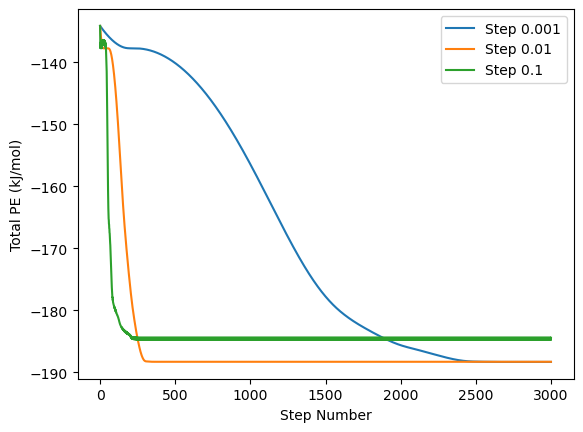

In [17]:
fig, ax = plt.subplots()
ax.plot(range(0, 3000), energy_small, label = 'Step 0.001')
ax.plot(range(0, 3000), energy_mid, label = 'Step 0.01')
ax.plot(range(0, 3000), energy_big, label = 'Step 0.1')
ax.set_xlabel('Step Number')
ax.set_ylabel('Total PE (kJ/mol)')
ax.legend()

plt.show()

With too large of a stepsize, it may not optimized to as low of a minimum in PE as it will just step over the minimul in the last steps. With too small a stepsize, the optimization will take a lot of steps but we have a clearer PE minimization curve. Ideally, you could optimize something to a structure that is closer to the "true minimum" and do it in less steps so it takes less time which is why it's important to not make the step too small or too big. 